# World Happiness Report 2020

In this program I am loading the World Happiness Report dataset from 2020 into a dataframe and doing some exploratory data analysis.

## About the Dataset

This dataset contains the Happiness Score for over 150 countries for the year of 2020. The data gathered from the Gallup World Poll gives a national average of Happiness scores for countries all over the world. It is an annual landmark survey of the state of global happiness.

This dataset is from the data repository "Kaggle". On Kaggle's dataset page, I searched for Africa Happiness after filtering the search to CSV file type. I wasn't able to find any datasets that could answer my questions that didn't include other countries from different continents. I decided to use a Global Happiness Report to answer the questions I have. The dataset I am using was publish by Micheal Londeen and it was created on March 24, 2020. His main source is the World Happiness Report for 2020.

More about this dataset: https://www.kaggle.com/datasets/mathurinache/world-happiness-report?select=2020.csv

### Dataset Features

1. Country Name
2. Regional Indicator
3. Happiness score (Ladder Score)
5. Healthy Life Expectancy (HLE)
6. Social support
7. Freedom to make life choices
8. Generosity
9. Perceptions of Corruption

Explanation of the features: https://happiness-report.s3.amazonaws.com/2020/WHR20_Ch2_Statistical_Appendix.pdf

### EDA Questions
1. Which country has the highest score? Why?
2. How many observations are there?
3. Are there any null values? How does this dataset need to be cleaned?
4. Is there any correlation between the features?
5. Are the minimum and maximum happiness scores reasonable? Are there any outliers?
6. What is the mean happiness score?

In [4]:
# imports
import seaborn as sns
import pandas as pd
import numpy as np

### Reading in the Data

First I am going to read in the data as a dataframe. It is a .csv file but I pushed it to GitHub so I can paste the raw link into the read_csv() function.

In [21]:
data_url = 'https://raw.githubusercontent.com/stubbsdiondra/PortfolioProjects/main/World%20Happiness%202020%20Project/2020.csv'

In [22]:
# loading into a dataframe
df = pd.read_csv(data_url)
df

,Country Name,Regional Indicator,Happiness Scores,Social Support,Healthy Life Expectancy,Freedom to Make Life Choices,Generosity,Perceptions of Corruption
0,Finland,Europe,7.8087,0.954330,71.900825,0.949172,-0.059482,0.195445
1,Denmark,Europe,7.6456,0.955991,72.402504,0.951444,0.066202,0.168489
2,Switzerland,Europe,7.5599,0.942847,74.102448,0.921337,0.105911,0.303728
3,Iceland,Europe,7.5045,0.974670,73.000000,0.948892,0.246944,0.711710
4,Norway,Europe,7.4880,0.952487,73.200783,0.955750,0.134533,0.263218
...,...,...,...,...,...,...,...,...
148,Central African Republic,Africa,3.4800,0.320000,45.200000,0.640000,0.080000,0.890000
149,Rwanda,Africa,3.3100,0.540000,61.100000,0.900000,0.060000,0.180000
150,Zimbabwe,Africa,3.3000,0.760000,55.620000,0.710000,-0.070000,0.810000
151,South Sudan,Africa,2.8200,0.550000,51.000000,0.450000,0.020000,0.760000


In [23]:
df.columns

Index(['Country Name', 'Regional Indicator', 'Happiness Scores',
       'Social Support', 'Healthy Life Expectancy',
       'Freedom to Make Life Choices', 'Generosity',
       'Perceptions of Corruption'],
      dtype='object')

### Exploratory Data Analysis

I want to know how many observations are in the dataset. The .shape attribute will tell me the amount of rows and columns.

In [24]:
df.shape

(153, 8)

There are 153 observations or 153 countries in this dataset.

I want to know if there are any NaN values in this dataset. This following shows that there are none.

In [25]:
df.isnull().values.any()

False

#### What are the data types in this dataset? Do they make sense?

In [26]:
df.dtypes

Country Name                     object
Regional Indicator               object
Happiness Scores                float64
Social Support                  float64
Healthy Life Expectancy         float64
Freedom to Make Life Choices    float64
Generosity                      float64
Perceptions of Corruption       float64
dtype: object

All the data types make sense for the columns in this dataset. It makes sense that Country name and Regional indicator are read in as objects since they are strings. The rest of the columns are decimal values so they should be read in as floats.

From this we can see that this dataset doesn't need to be cleaned.

### Are the minimum and maximum happiness scores reasonable? Are there any outliers?

In [27]:
df['Happiness Scores'].max()

7.808700085

In [28]:
df.columns

Index(['Country Name', 'Regional Indicator', 'Happiness Scores',
       'Social Support', 'Healthy Life Expectancy',
       'Freedom to Make Life Choices', 'Generosity',
       'Perceptions of Corruption'],
      dtype='object')

In [29]:
df['Happiness Scores'].min()

2.566900015

They are reasonable since all the scores range between 1 and 8. 

### What's the average score for all the countries?

In [30]:
df['Happiness Scores'].mean()

5.473249015261436

### Is there any correlation between the features? 

I'm going to use happiness Score as the taregt since the other features explain it.

In [31]:
# Using pearson correlation to find out what features contribute most to predicting our target
correlation = df.corr('pearson')
correlation

,Happiness Scores,Social Support,Healthy Life Expectancy,Freedom to Make Life Choices,Generosity,Perceptions of Corruption
Happiness Scores,1.000000,0.765448,0.770371,0.591004,0.069882,-0.417930
Social Support,0.765448,1.000000,0.742959,0.478788,-0.057798,-0.209332
Healthy Life Expectancy,0.770371,0.742959,1.000000,0.447925,-0.071020,-0.352839
Freedom to Make Life Choices,0.591004,0.478788,0.447925,1.000000,0.254236,-0.421204
Generosity,0.069882,-0.057798,-0.071020,0.254236,1.000000,-0.280495
Perceptions of Corruption,-0.417930,-0.209332,-0.352839,-0.421204,-0.280495,1.000000


In [32]:
abs(correlation['Happiness Scores'].sort_values(ascending=False))

Happiness Scores                1.000000
Healthy Life Expectancy         0.770371
Social Support                  0.765448
Freedom to Make Life Choices    0.591004
Generosity                      0.069882
Perceptions of Corruption       0.417930
Name: Happiness Scores, dtype: float64

Healthy life expectancy and Social support are highly correlated with Happiness Scores. This means that if I wanted perform a predicitve analysis, I could play around with some regression models using these three features to predict the target, Happiness Scores.

### Which country has the highest score? Why?

In [33]:
df

,Country Name,Regional Indicator,Happiness Scores,Social Support,Healthy Life Expectancy,Freedom to Make Life Choices,Generosity,Perceptions of Corruption
0,Finland,Europe,7.8087,0.954330,71.900825,0.949172,-0.059482,0.195445
1,Denmark,Europe,7.6456,0.955991,72.402504,0.951444,0.066202,0.168489
2,Switzerland,Europe,7.5599,0.942847,74.102448,0.921337,0.105911,0.303728
3,Iceland,Europe,7.5045,0.974670,73.000000,0.948892,0.246944,0.711710
4,Norway,Europe,7.4880,0.952487,73.200783,0.955750,0.134533,0.263218
...,...,...,...,...,...,...,...,...
148,Central African Republic,Africa,3.4800,0.320000,45.200000,0.640000,0.080000,0.890000
149,Rwanda,Africa,3.3100,0.540000,61.100000,0.900000,0.060000,0.180000
150,Zimbabwe,Africa,3.3000,0.760000,55.620000,0.710000,-0.070000,0.810000
151,South Sudan,Africa,2.8200,0.550000,51.000000,0.450000,0.020000,0.760000


In [34]:
df.columns

Index(['Country Name', 'Regional Indicator', 'Happiness Scores',
       'Social Support', 'Healthy Life Expectancy',
       'Freedom to Make Life Choices', 'Generosity',
       'Perceptions of Corruption'],
      dtype='object')

In [35]:
df['Happiness Scores'].max()

7.808700085

The highest happiness score in  belongs to Finland with a score of 7.8.

#### Why?

First I'll look at the data for this country.

In [36]:
df.loc[0]

Country Name                      Finland
Regional Indicator                 Europe
Happiness Scores                   7.8087
Social Support                    0.95433
Healthy Life Expectancy         71.900825
Freedom to Make Life Choices     0.949172
Generosity                      -0.059482
Perceptions of Corruption        0.195445
Name: 0, dtype: object

In [37]:
df.describe()

,Happiness Scores,Social Support,Healthy Life Expectancy,Freedom to Make Life Choices,Generosity,Perceptions of Corruption
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,5.473249,0.808636,64.445650,0.783413,-0.014719,0.733179
std,1.112094,0.121546,7.057819,0.117595,0.151764,0.175276
min,2.566900,0.320000,45.200000,0.396573,-0.300907,0.109784
25%,4.720000,0.740000,58.961712,0.714839,-0.127015,0.682620
50%,5.515000,0.830000,66.305145,0.799805,-0.033665,0.783122
75%,6.228500,0.906747,69.289192,0.877709,0.085429,0.850000
max,7.808700,0.974670,76.804581,0.974998,0.560664,0.935585


I'm looking at the maximum values across all columns. Finland has a pretty high value for Social Support, Healthy Life Expectancy and Freedom to Make Life Choices when compared to the maximum. It has a fairly low score for Perceptions of Corruption when compared to the minimum.

While this does not determine Finland's score, it may explain why they score the highest Happiness score in the world.

In [38]:
df.corr()

,Happiness Scores,Social Support,Healthy Life Expectancy,Freedom to Make Life Choices,Generosity,Perceptions of Corruption
Happiness Scores,1.000000,0.765448,0.770371,0.591004,0.069882,-0.417930
Social Support,0.765448,1.000000,0.742959,0.478788,-0.057798,-0.209332
Healthy Life Expectancy,0.770371,0.742959,1.000000,0.447925,-0.071020,-0.352839
Freedom to Make Life Choices,0.591004,0.478788,0.447925,1.000000,0.254236,-0.421204
Generosity,0.069882,-0.057798,-0.071020,0.254236,1.000000,-0.280495
Perceptions of Corruption,-0.417930,-0.209332,-0.352839,-0.421204,-0.280495,1.000000


Text(0.5, 1.0, 'Correlations of Country Data Features')

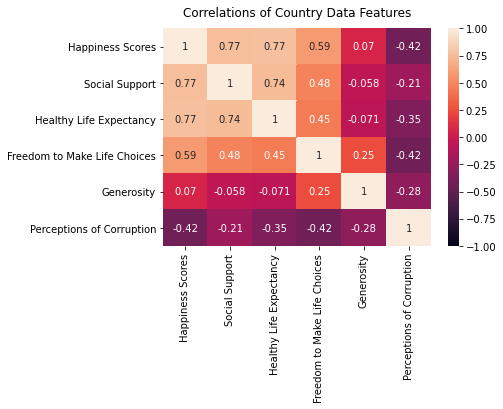

In [39]:
heatmap = sns.heatmap(df.corr(),vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlations of Country Data Features', fontdict={'fontsize':12}, pad=12)

Social Support and Healthy Life Expectancy are highly correlated with Happiness Score. Freedom to Make Life choices also has a significant correlation to Happpiness Scores. 

Correlation does not mean causation but these features may contribute better than the other factors. This can also give us an idea of which features to drop when we run the regression analysis on this data.